In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])
import sympy as sp
import random
from IPython.display import display, Math
import pandas as pd
from scipy.special import erfc 
from IPython.core.display import Latex
from sympy import *
    

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

# Problem 1

### Problem 1.1

In [79]:
def simulate_pushup_days(num_pushup_days):
    waiting_times = []
    pushups_per_day = []
    
    days = 0
    while len(waiting_times) < num_pushup_days:
        roll = random.randint(1,6)
        if roll == 6:
            waiting_times.append(days)

            pushups = sum(1 for _ in range(120) if random.randint(1,6) == 6)
            pushups_per_day.append(pushups)

            days = 0
        else:
            days += 1

    return np.array(waiting_times), np.array(pushups_per_day)

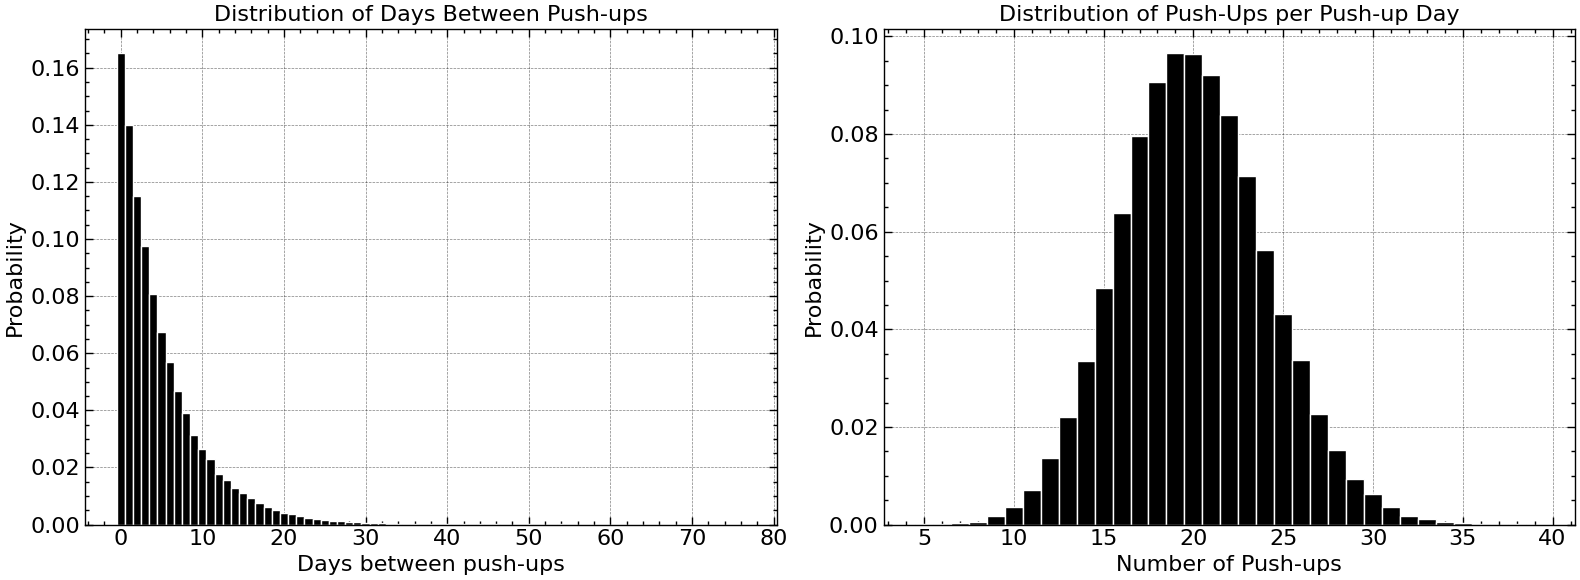

In [80]:
#Distribution of days between push-ups

waiting_times, pushups_per_day = simulate_pushup_days(100000)

plt.figure(figsize = (16,6))
d_waiting_times                       =   np.diff(np.unique(waiting_times)).min()
d_pushups_per_day                     =   np.diff(np.unique(pushups_per_day)).min()
left_of_first_bin_waiting_times       =   waiting_times.min() - float(d_waiting_times)/2
right_of_first_bin_waiting_times      =   waiting_times.max() + float(d_waiting_times)/2
left_of_first_bin_pushups_per_day     =   pushups_per_day.min() - float(d_pushups_per_day)/2
right_of_first_bin_pushups_per_day    =   pushups_per_day.max() + float(d_pushups_per_day)/2

plt.subplot(1,2,1)
plt.hist(waiting_times, bins = np.arange(left_of_first_bin_waiting_times, right_of_first_bin_waiting_times + d_waiting_times, d_waiting_times), density=True,
         edgecolor = 'white', color = 'black')
plt.title("Distribution of Days Between Push-ups")
plt.xlabel("Days between push-ups")
plt.ylabel("Probability")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.subplot(1,2,2)
plt.hist(pushups_per_day, bins = np.arange(left_of_first_bin_pushups_per_day, right_of_first_bin_pushups_per_day + d_pushups_per_day, d_pushups_per_day), density=True, 
         edgecolor = 'white', color = 'black')
plt.title("Distribution of Push-Ups per Push-up Day")
plt.xlabel("Number of Push-ups")
plt.ylabel("Probability")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.savefig('Problem 1.1.1.png', dpi = 300)

In [81]:
#Mean, median, and standard deviation of number of push-ups in 10 days
def simulate_pushups(num_days):
    pushups_per_day = []

    for _ in range(num_days):
        roll = random.randint(1,6)

        if roll == 6:
            pushups = sum(1 for _ in range(120) if random.randint(1,6) == 6)
        
        else:
            pushups = 0

        pushups_per_day.append(pushups)

    return np.array(pushups_per_day)

In [82]:
#Simulation
N_experiments = 150000
totals = []

for _ in range(N_experiments):
    pushups = simulate_pushups(10)
    totals.append(pushups.sum())

totals = np.array(totals)

display(Math(fr"\mu = {np.mean(totals):.2f}"))
display(Math(fr"Median = {np.median(totals):.2f}"))
display(Math(fr"\sigma =  {np.std(totals):.2f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

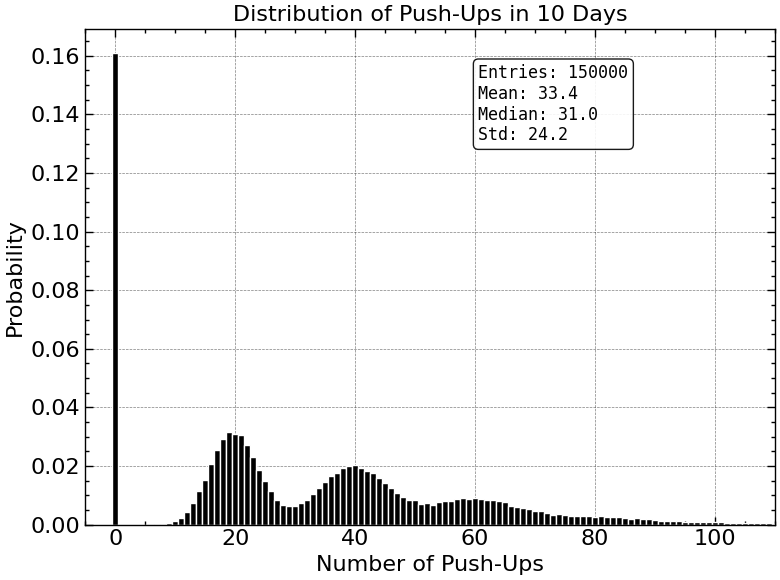

In [83]:
plt.figure(figsize=(8,6))

d_totals = np.diff(np.unique(totals)).min()
left_of_first_bin_totals = totals.min() - d_totals/2
right_of_first_bin_totals = totals.max() + d_totals/2

plt.subplot(1,1,1)
plt.hist(totals, bins=np.arange(left_of_first_bin_totals, right_of_first_bin_totals + d_totals, d_totals), density=True, edgecolor='white', color='black')
plt.xlim(-5, 110)
plt.title("Distribution of Push-Ups in 10 Days")
plt.xlabel("Number of Push-Ups")
plt.ylabel("Probability")

mu = np.mean(totals)
med = np.median(totals)
sigma = np.std(totals)
entries = len(totals)

plot_info = [
    f"Entries: {entries}",
    f"Mean: {mu:.1f}",
    f"Median: {med:.1f}",
    f"Std: {sigma:.1f}",
]

plt.text(
    0.57, 0.93,
    "\n".join(plot_info),
    transform=plt.gca().transAxes,
    fontsize=12,
    family='monospace',
    verticalalignment='top',
    bbox=dict(
        facecolor='white',      
        edgecolor='black',      
        boxstyle='round,pad=0.3', 
        alpha=0.9               
    )
)

plt.tight_layout()
plt.savefig('Problem 1.1.2.png', dpi = 300)

# Problem 2

### Problem 2.1

In [84]:
mu_r_earth   =  149*10e-06
sig_r_earth  =  3*10e-06
mu_r_sun     =  25*10e-06
sig_r_sun    =  5*10e-06
mu_r_comet   =  309*10e-06
sig_r_comet  =  20*10e-06

In [85]:
# Define variables:
f, r_earth,r_sun,r_comet = symbols("f, r_e, r_s, r_C")
df,dr_earth,dr_sun,dr_comet = symbols("sigma_f, sigma_e, sigma_s, sigma_c")

f = (r_earth - r_comet)/(r_sun - r_comet)
lprint(latex(Eq(symbols('f'),f)))

# Calculate uncertainty and print:
df = sqrt((f.diff(r_earth) * dr_earth)**2 + (f.diff(r_sun) * dr_sun)**2 + (f.diff(r_comet) * dr_comet)**2)
lprint(latex(Eq(symbols('sigma_f'), df)))

# Turn expression into numerical functions 
ff = lambdify((r_earth,r_sun, r_comet),f)
fdf = lambdify((r_earth,dr_earth,r_sun,dr_sun,r_comet, dr_comet),df)

# Numerically evaluate expressions and print 
vf = ff(mu_r_earth,mu_r_sun,mu_r_comet)
vdf = fdf(mu_r_earth,sig_r_earth,mu_r_sun,sig_r_sun,mu_r_comet,sig_r_comet)
lprint(fr'f = {vf:.2f} \pm {vdf:.2f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.2

In [86]:
mu_N   =  1971
sig_N  =  np.sqrt(1971)
mu_t   =  98.4
sig_t  =  3.7

In [87]:
# Define variables:
r, N, t = symbols("r, N, t")
dr, dN, dt = symbols("sigma_r, sigma_N, sigma_t")

r = N/t
lprint(latex(Eq(symbols('r'),r)))

dr= sqrt((r.diff(N) * dN)**2 + (r.diff(t) * dt)**2)
lprint(latex(Eq(symbols('sigma_r'), dr)))

fr = lambdify((N, t),r, 'numpy')
fdr = lambdify((N, dN, t, dt),dr, 'numpy')

vr = fr(mu_N, mu_t)
vdr = fdr(mu_N, sig_N, mu_t, sig_t)
lprint(fr'r = {vr:.1f} \pm {vdr:.1f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.3

### Without uncertainties

In [88]:
def chauvenet(y):
    mean = np.mean(y)
    std  = np.std(y)
    N = len(y)
    criterion = 1/(2*N)

    d = np.abs(y - mean) / std
    d /= np.sqrt(2)
    prob = erfc(d)

    return prob >= criterion

In [89]:
pylon_data = pd.read_csv('Problem 2/data_PylonPositions.csv', delimiter=',', header = 0)

pylon_data_sorted = pylon_data.sort_values(['# Position']).reset_index(drop = True)
pylon_data_sorted

,# Position,Uncertainty
0,38.946,-1.000
1,39.348,-1.000
2,46.639,-1.000
3,46.645,-1.000
4,47.813,1.830
...,...,...
115,173.726,-1.000
116,173.763,-1.000
117,173.981,-1.000
118,173.993,0.722


120


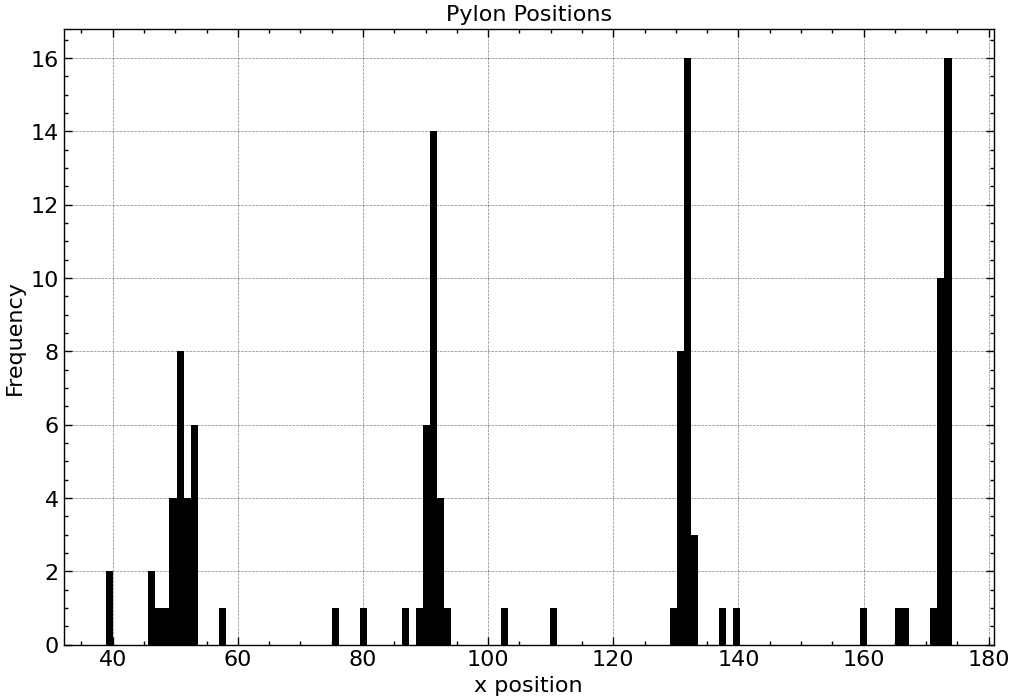

In [90]:
#Plotting of raw data
plt.figure(figsize = (12,8))
plt.hist(pylon_data_sorted['# Position'], bins = 120, color = 'black')
plt.xlabel('x position')
plt.ylabel('Frequency')
plt.title('Pylon Positions')

plt.savefig('Problem 2.3 - raw data.png', dpi = 300)
print(len(pylon_data_sorted))

In [91]:
# Doing chauvenet on clusters
x = np.array(pylon_data_sorted['# Position'])

cluster1 = x[(x > 30) & (x < 70)]
cluster2 = x[(x > 70) & (x < 110)]
cluster3 = x[(x > 110) & (x < 150)]
cluster4 = x[(x > 150) & (x < 190)]

cluster1_mean   =   np.mean(cluster1)
cluster2_mean   =   np.mean(cluster2)
cluster3_mean   =   np.mean(cluster3)
cluster4_mean   =   np.mean(cluster4)

cluster1_std   =   np.std(cluster1)
cluster2_std   =   np.std(cluster2)
cluster3_std   =   np.std(cluster3)
cluster4_std   =   np.std(cluster4)

print(cluster1_mean, cluster1_std/np.sqrt(len(cluster1)))
print(cluster2_mean, cluster2_std/np.sqrt(len(cluster2)))
print(cluster3_mean, cluster3_std/np.sqrt(len(cluster3)))
print(cluster4_mean, cluster4_std/np.sqrt(len(cluster4)))

50.122413793103455 0.6827415175796556
90.50933333333333 0.7569979250424129
131.2776129032258 0.7672123229903306
172.1302 0.5307416370828025


### With uncertainties

In [92]:
x = np.array(pylon_data_sorted['# Position'])
sx = np.array(pylon_data_sorted['  Uncertainty'])

mask1 = (x > 30) & (x < 70)
mask2 = (x > 70) & (x < 110)
mask3 = (x > 110) & (x < 150)
mask4 = (x > 150) & (x < 190)

x1, s1 = x[mask1], sx[mask1]
x2, s2 = x[mask2], sx[mask2]
x3, s3 = x[mask3], sx[mask3]
x4, s4 = x[mask4], sx[mask4]

def weighted_mean(x, sx):
    w = 1.0 / sx**2
    mu = np.sum(w * x) / np.sum(w)
    err_mu = np.sqrt(1.0 / np.sum(w))
    return mu, err_mu

m1, e1 = weighted_mean(x1, s1)
m2, e2 = weighted_mean(x2, s2)
m3, e3 = weighted_mean(x3, s3)
m4, e4 = weighted_mean(x4, s4)

print(m1, "+/-", e1)
print(m2, "+/-", e2)
print(m3, "+/-", e3)
print(m4, "+/-", e4)

def reduced_chi2(x, sx, mu):
    return np.sum(((x - mu)/sx)**2) / (len(x) - 1)

e1 *= np.sqrt(reduced_chi2(x1, s1, m1))

import numpy as np
from scipy.stats import chi2

def chi2_stats(x, sx, mu):
    chi2_val = np.sum(((x - mu) / sx)**2)
    ndof = len(x) - 1
    chi2_red = chi2_val / ndof
    p_val = chi2.sf(chi2_val, ndof)
    return chi2_val, chi2_red, ndof, p_val

clusters = [
    (x1, s1, m1, "Cluster 1"),
    (x2, s2, m2, "Cluster 2"),
    (x3, s3, m3, "Cluster 3"),
    (x4, s4, m4, "Cluster 4"),
]

for x, sx, mu, label in clusters:
    chi2_val, chi2_red, ndof, p_val = chi2_stats(x, sx, mu)
    print(f"{label}:")
    print(f"  chi^2 = {chi2_val:.2f}")
    print(f"  ndof = {ndof}")
    print(f"  chi^2_red = {chi2_red:.2f}")
    print(f"  p-value = {p_val:.3e}\n")



49.99234988693276 +/- 0.21018745530798616
90.6659956136879 +/- 0.17174954392033062
130.89975430853178 +/- 0.15803543386481994
171.892255725495 +/- 0.16550360147438872
Cluster 1:
  chi^2 = 369.41
  ndof = 28
  chi^2_red = 13.19
  p-value = 3.057e-61

Cluster 2:
  chi^2 = 338.89
  ndof = 29
  chi^2_red = 11.69
  p-value = 1.498e-54

Cluster 3:
  chi^2 = 1124.76
  ndof = 30
  chi^2_red = 37.49
  p-value = 2.146e-217

Cluster 4:
  chi^2 = 437.15
  ndof = 29
  chi^2_red = 15.07
  p-value = 2.107e-74



In [93]:
import numpy as np
from scipy.stats import chi2

# Define function for weighted mean with scatter correction
def weighted_mean_with_scatter(x, sx):
    """
    x : array of measurements
    sx: array of per-point uncertainties
    Returns: mu, err_mu, chi2, chi2_red, ndof, p-value
    """
    w = 1.0 / sx**2
    mu = np.sum(w * x) / np.sum(w)
    chi2_val = np.sum(((x - mu)/sx)**2)
    ndof = len(x) - 1
    chi2_red = chi2_val / ndof
    # Weighted SEM
    err_mu = np.sqrt(1.0 / np.sum(w))
    # Scale uncertainty if chi2_red > 1
    if chi2_red > 1:
        err_mu *= np.sqrt(chi2_red)
    # p-value
    p_val = chi2.sf(chi2_val, ndof)
    return mu, err_mu, chi2_val, chi2_red, ndof, p_val

# Example clusters (replace with your actual arrays)
clusters = [
    (x1, s1, "Cluster 1"),
    (x2, s2, "Cluster 2"),
    (x3, s3, "Cluster 3"),
    (x4, s4, "Cluster 4"),
]

# Compute and print results for each cluster
for x, sx, label in clusters:
    mu, err_mu, chi2_val, chi2_red, ndof, p_val = weighted_mean_with_scatter(x, sx)
    print(f"{label}:")
    print(f"  Weighted mean = {mu:.6f} ± {err_mu:.6f}")
    print(f"  chi^2 = {chi2_val:.2f}")
    print(f"  ndof = {ndof}")
    print(f"  chi^2_red = {chi2_red:.2f}")
    print(f"  p-value = {p_val:.3e}\n")


Cluster 1:
  Weighted mean = 49.992350 ± 0.763452
  chi^2 = 369.41
  ndof = 28
  chi^2_red = 13.19
  p-value = 3.057e-61

Cluster 2:
  Weighted mean = 90.665996 ± 0.587117
  chi^2 = 338.89
  ndof = 29
  chi^2_red = 11.69
  p-value = 1.498e-54

Cluster 3:
  Weighted mean = 130.899754 ± 0.967664
  chi^2 = 1124.76
  ndof = 30
  chi^2_red = 37.49
  p-value = 2.146e-217

Cluster 4:
  Weighted mean = 171.892256 ± 0.642572
  chi^2 = 437.15
  ndof = 29
  chi^2_red = 15.07
  p-value = 2.107e-74



### Do measurements match?

In [94]:
import numpy as np
from scipy.stats import chi2

# Group 1 (no uncertainties provided, so using ± values as SEM)
p1_means = np.array([50.1, 90.5, 131.3, 172.1])
p1_errs  = np.array([0.7, 0.8, 0.8, 0.5])

# Group 2 (with uncertainties)
p2_means = np.array([50.0, 90.7, 130.9, 171.9])
p2_errs  = np.array([0.8, 0.6, 1.0, 0.6])

# 1️⃣ Check if the two groups match
print("Comparison of the two groups:")
for i, (m1, e1, m2, e2) in enumerate(zip(p1_means, p1_errs, p2_means, p2_errs), 1):
    diff = m1 - m2
    err_diff = np.sqrt(e1**2 + e2**2)
    z_score = diff / err_diff
    print(f"Pylon {i}: Δ = {diff:.2f} ± {err_diff:.2f}, Z = {z_score:.2f}")

# 2️⃣ Combine the groups using weighted mean
def weighted_mean(mu1, err1, mu2, err2):
    w1 = 1.0 / err1**2
    w2 = 1.0 / err2**2
    mu_comb = (w1*mu1 + w2*mu2) / (w1 + w2)
    err_comb = np.sqrt(1 / (w1 + w2))
    return mu_comb, err_comb

combined_means = []
combined_errs = []

for m1, e1, m2, e2 in zip(p1_means, p1_errs, p2_means, p2_errs):
    mu, err = weighted_mean(m1, e1, m2, e2)
    combined_means.append(mu)
    combined_errs.append(err)

combined_means = np.array(combined_means)
combined_errs = np.array(combined_errs)

print("\nCombined pylon positions:")
for i, (mu, err) in enumerate(zip(combined_means, combined_errs), 1):
    print(f"Pylon {i}: {mu:.2f} ± {err:.2f}")

# 3️⃣ Check if pylons are equidistant
dx = np.diff(combined_means)
dx_mean = np.mean(dx)
deviation = dx - dx_mean
dx_err = np.sqrt(combined_errs[:-1]**2 + combined_errs[1:]**2)
z_scores = deviation / dx_err

print("\nDistances between pylons:", dx)
print("Deviation from mean spacing:", deviation)
print("Z-scores:", z_scores)

# Optional: chi-square test for equidistant spacing
chi2_spacing = np.sum((deviation / dx_err)**2)
ndof = len(dx) - 1
p_val_spacing = chi2.sf(chi2_spacing, ndof)
print(f"\nChi2 spacing = {chi2_spacing:.2f}, ndof = {ndof}, p-value = {p_val_spacing:.3e}")


Comparison of the two groups:
Pylon 1: Δ = 0.10 ± 1.06, Z = 0.09
Pylon 2: Δ = -0.20 ± 1.00, Z = -0.20
Pylon 3: Δ = 0.40 ± 1.28, Z = 0.31
Pylon 4: Δ = 0.20 ± 0.78, Z = 0.26

Combined pylon positions:
Pylon 1: 50.06 ± 0.53
Pylon 2: 90.63 ± 0.48
Pylon 3: 131.14 ± 0.62
Pylon 4: 172.02 ± 0.38

Distances between pylons: [40.57136283 40.51590244 40.87413035]
Deviation from mean spacing: [-0.08243571 -0.1378961   0.22033181]
Z-scores: [-0.11566895 -0.17503735  0.30045048]

Chi2 spacing = 0.13, ndof = 2, p-value = 9.351e-01


# Problem 3 

### Problem 3.1

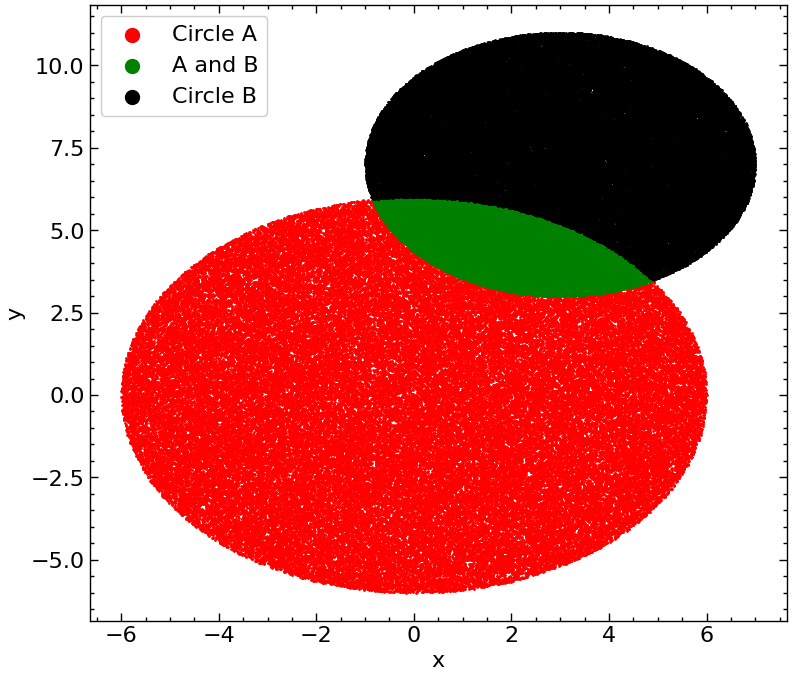

Fraction A in B = 0.0921 +- 0.00092
Fraction B in A = 0.2013 +- 0.00201


In [137]:
N_exp      = 100
N          = 100000

#Circle parameters
Ax, Ay, RA = 0, 0, 6
Bx, By, RB = 3, 7, 4

#Generation of points for circle A
rA          = RA * np.sqrt(np.random.rand(N))
theta_A     = 2 * np.pi * np.random.rand(N)
xA          = Ax + rA * np.cos(theta_A)
yA          = Ay + rA * np.sin(theta_A)

#Generation of points for circle B
rB          = RB * np.sqrt(np.random.rand(N))
theta_B     = 2 * np.pi * np.random.rand(N)
xB          = Bx + rB * np.cos(theta_B)
yB          = By + rB * np.sin(theta_B)

#List for multiple experiments
fraction_A_in_B_list = np.array([])
fraction_B_in_A_list = np.array([])

for i in range(N_exp):
    #Fraction of A overlapping B
    inside_B                = (xA-Bx)**2 + (yA-By)**2 <= RB**2
    fraction_A_in_B         = np.sum(inside_B)/N
    fraction_A_in_B_list    = np.append(fraction_A_in_B_list, fraction_A_in_B)


    #Fraction of B overlapping A
    inside_A    = (xB-Ax)**2 + (yB-Ay)**2 <= RA**2
    fraction_B_in_A     = np.sum(inside_A)/N
    fraction_B_in_A_list    = np.append(fraction_B_in_A_list, fraction_B_in_A)


# Check which points are also inside
plt.figure(figsize = (9,8))
plt.scatter(xA[~inside_B], yA[~inside_B], s=1, color='red', label='Circle A')
plt.scatter(xA[inside_B], yA[inside_B], s=1, color='green', label='A and B')

# Points in B
plt.scatter(xB[inside_A], yB[inside_A], s=1, color='green')
plt.scatter(xB[~inside_A], yB[~inside_A], s=1, color='black', label='Circle B')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(markerscale=10)
plt.grid()
plt.savefig('Problem 3.1.1.png', dpi = 300)
plt.show()

print(fr'Fraction A in B = {np.mean(fraction_A_in_B_list):.4f} +- {np.mean(fraction_A_in_B_list)/N_exp:.5f}')
print(fr'Fraction B in A = {np.mean(fraction_B_in_A_list):.4f} +- {np.mean(fraction_B_in_A_list)/N_exp:.5f}')